# K-Nearest Neighbor Algorithm (KNN)

#### Import necessary Libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np

%matplotlib inline

### Load the dataset from scikit-learn libray

In [2]:
iris_data = datasets.load_iris()
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
# iris_data.data
# iris_data.target

X = iris_data.data
Y = iris_data.target

print(X.shape)
print(Y.shape)

print(iris_data.target_names)

(150, 4)
(150,)
['setosa' 'versicolor' 'virginica']


#### Split the data into train and test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.3,
                                                    random_state=101)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [6]:
# X

In [7]:
# print(X[:,1])

# print(X[:,2])
# X[0:2,0:2]

## Sepal Plot examples

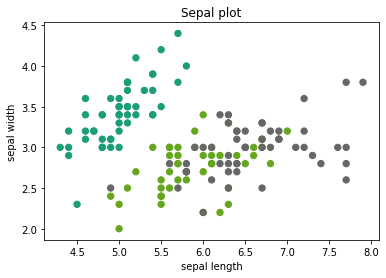

In [8]:
plt.scatter(X[:,0],X[:,1], c=Y, s=40, cmap=plt.cm.Dark2)
plt.title('Sepal plot')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

## Petal Plot examples

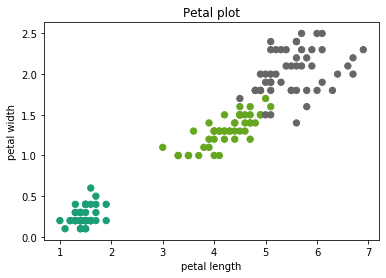

In [9]:
plt.scatter(X[:,2],X[:,3], c=Y, s=40, cmap=plt.cm.Dark2)
plt.title('Petal plot')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

### Train the model

In [10]:
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
cv_results = model_selection.cross_val_score(KNeighborsClassifier(),
                                            X_train, y_train,
                                            cv=kfold,
                                            scoring='accuracy')

In [11]:
# Try running from K=1 through 20 and record testing accuracy

k_range = range(1, 21)

scores = {}
score_list = []
errors = []

for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    predictions = knn.predict(X_test) 
    scores[k] = accuracy_score(y_test, predictions)
    score_list.append(accuracy_score(y_test, predictions))
    errors.append(mean_squared_error(y_test, predictions))
    

In [12]:
scores

{1: 1.0,
 2: 0.9555555555555556,
 3: 1.0,
 4: 0.9555555555555556,
 5: 1.0,
 6: 1.0,
 7: 0.9777777777777777,
 8: 0.9555555555555556,
 9: 1.0,
 10: 1.0,
 11: 0.9777777777777777,
 12: 0.9555555555555556,
 13: 0.9777777777777777,
 14: 0.9777777777777777,
 15: 0.9777777777777777,
 16: 0.9777777777777777,
 17: 0.9555555555555556,
 18: 0.9333333333333333,
 19: 0.9555555555555556,
 20: 0.9333333333333333}

### Classification Reports for a single k value

In [13]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

print("\nTraining Accuracy: %.2f" % accuracy_score(y_test, predictions))
print('========================')

print("Confusion Matrix: \n", confusion_matrix(y_test, predictions))
print("=========================================================")

print("Classification Report:\n", classification_report(y_test, predictions))
print("=========================================================")

print("\nValidation Accuracy: %.2f  Validation Loss: %.2f" % (cv_results.mean(), cv_results.std()) )


Training Accuracy: 1.00
Confusion Matrix: 
 [[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Validation Accuracy: 0.94  Validation Loss: 0.05


## Value of K for KNN relashinship between k and test accuracy

Text(0, 0.5, 'Testing Accuracy')

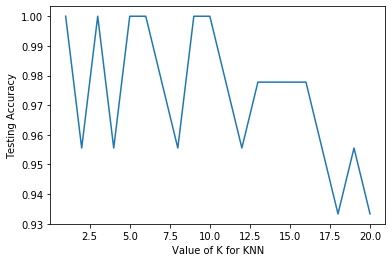

In [14]:
plt.plot(k_range, score_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Errors')

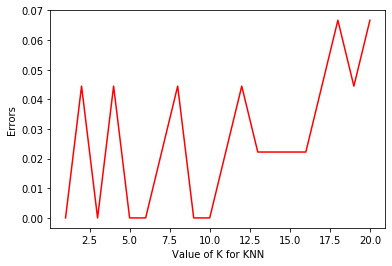

In [15]:
plt.plot(k_range, errors, 'r')
plt.xlabel('Value of K for KNN')
plt.ylabel('Errors')

# Test the model

In [16]:
classes = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [17]:
classes

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [18]:
# Make a prediction on unseen data
x_new = pd.read_csv('iris-test.csv')
# print(x_new)
len(x_new)

11

In [19]:
test = np.array(x_new)
# print(test)

y_predict = knn.predict(test)

for i in range(len(test)):
    print('Predicted Class: %s' % classes[y_predict[i]])

Predicted Class: setosa
Predicted Class: setosa
Predicted Class: setosa
Predicted Class: versicolor
Predicted Class: versicolor
Predicted Class: versicolor
Predicted Class: virginica
Predicted Class: virginica
Predicted Class: virginica
Predicted Class: virginica
Predicted Class: setosa


# Done.